In [ ]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.miscmodels.ordinal_model import OrderedModel
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
from statsmodels.formula.api import ols
from sklearn.neighbors import NearestNeighbors
import matplotlib.figure as mlf
import seaborn as sns

In [3]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('nhis_00004.csv')
df.head()

,YEAR,SERIAL,STRATA,PSU,NHISHID,REGION,URBRRL,PERNUM,NHISPID,HHX,SAMPWEIGHT,ASTATFLG,CSTATFLG,ASTATQCFLAG,INTERIMWT,AGE,SEX,MARSTCUR,FAMSIZE,RACENEW,NOWAF,ARMFEV,EDUC,EMPSTAT,INCFAM07ON,IMPINCFAM,OWNERSHIP,HEALTH,BMICAT,HIPRIVATEE,HIMCAIDE,HIMCAREE,ASTHMAEV,CANCEREV,CHEARTDIEV,CHOLHIGHEV,HEARTATTEV,STROKEV,ARTHLIMIT,DIAPRE,CHOLMEDNOW,HYP2TIME,HPVACHAD,JNTMO,SMOKFREQNOW,SMKLSEV,PAINFREQ3MO
0,2019,1,151,12,0002019H000003,4,1,1,0002019H00000310,H000003,12052.500,1,0,1,12317.430,47,2,8,1,100,1,11,400,100,24,0,20,2,4,2,1,1,2,1,1,2,1,1,2,1,1,0,10,2,3,1,3
1,2019,2,102,1,0002019H000005,3,3,1,0002019H00000510,H000005,5964.669,1,0,1,5365.561,61,1,1,2,100,1,11,201,100,12,0,10,4,4,2,1,1,1,1,1,1,1,1,1,2,0,2,10,2,0,2,3
2,2019,3,129,45,0002019H000006,4,1,1,0002019H00000610,H000006,5521.791,1,0,1,5061.655,77,2,1,2,100,0,11,301,200,22,0,10,1,2,2,1,2,1,1,1,1,1,1,0,1,0,0,0,0,0,1,2
3,2019,4,107,77,0002019H000008,2,2,1,0002019H00000810,H000008,8762.543,1,0,1,6641.679,37,2,1,5,100,1,11,303,100,24,0,10,1,4,2,1,1,1,1,1,1,1,1,0,1,0,0,10,0,3,1,2
4,2019,4,107,77,0002019H000008,2,2,2,0002019H00000820,H000008,10715.940,0,1,1,9655.160,8,1,0,5,100,1,0,0,0,24,0,10,1,0,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [4]:
# keeping the observations between the age of 25 and 65
df = df[(df['AGE']>=25) & (df['AGE']<=65)]
# keeping the observation who does not have caid and care insurance 
df = df[df["HIMCAIDE"]==1]
df = df[df["HIMCAREE"]==1]
# deleting the observations which does not have info about home ownership
df = df[df['OWNERSHIP']!=97]
df = df[df['OWNERSHIP']!=99]
df = df[df['OWNERSHIP']!=98]
# deleting the observations which does not have info about sex
df = df[df['SEX']!=7]
# deleting the observations which does not have info about marital status
df = df[df['MARSTCUR']!=3]
df = df[df['MARSTCUR']!=9]
# deleting the observations which does not have info about family size
df = df[df['FAMSIZE']!=99]
# deleting the observations which does not have info about race
df = df[df['RACENEW']!=998]
# deleting the observations which does not have info education
df = df[df['EDUC']!=999]
df = df[df['EDUC']!=997]
# deleting the observations which does not have info employment status
df = df[df['EMPSTAT']!=999]
# deleting the observations which does not have info self reported health status
df = df[df['HEALTH']!=9]
df = df[df['HEALTH']!=7]
# deleting the observations which does not have info about private insurance
df = df[df['HIPRIVATEE']!=3]
# excluding the observations who are in the armed forces
df = df[df['NOWAF']==1]
# excluding the observations who served in the army
df = df[df['ARMFEV']!=20]
# deleting the observations which do not have info about asthma
df = df[df['ASTHMAEV']!=7]
df = df[df['ASTHMAEV']!=9]
# deleting the observations which do not have info about cancer
df = df[df['CANCEREV']!=7]
df = df[df['CANCEREV']!=9]
# deleting the observations which do not have info about coronary heart disease
df = df[df['CHEARTDIEV']!=7]
df = df[df['CHEARTDIEV']!=9]
# deleting the observations which do not have info about high cholesterol
df = df[df['CHOLHIGHEV']!=7]
df = df[df['CHOLHIGHEV']!=9]
# deleting the observations which do not have info about heart attack
df = df[df['HEARTATTEV']!=9]
# deleting the observations which do not have info about stroke
df = df[df['STROKEV']!=9]
# deleting the observations which do not have info about prediabetes
df = df[df['DIAPRE']!=9]
# deleting the observations which do not have info about smokeless tobacco
df = df[df['SMKLSEV']!=7]
df = df[df['SMKLSEV']!=9]
df = df[df['SMKLSEV']!=8]
# deleting the observations which do not have info about frequency of pain in last 3 months
df = df[df['PAINFREQ3MO']!=7]
df = df[df['PAINFREQ3MO']!=9]

In [5]:
# dropping unnecessary columns from the dataset
df.drop(columns=['YEAR', 'SERIAL', 'NHISHID', 'PERNUM', 
                'NHISPID', 'HHX', 'ASTATFLG', 'CSTATFLG', 'ASTATQCFLAG', 'INTERIMWT',
                'NOWAF', 'ARMFEV', 'IMPINCFAM', 'BMICAT', 'HIMCAIDE', 'HIMCAREE',
                'ARTHLIMIT', 'CHOLMEDNOW', 'HYP2TIME', 'HPVACHAD', 'JNTMO', 'SMOKFREQNOW'], inplace=True)

In [6]:
df.head()

,STRATA,PSU,REGION,URBRRL,SAMPWEIGHT,AGE,SEX,MARSTCUR,FAMSIZE,RACENEW,EDUC,EMPSTAT,INCFAM07ON,OWNERSHIP,HEALTH,HIPRIVATEE,ASTHMAEV,CANCEREV,CHEARTDIEV,CHOLHIGHEV,HEARTATTEV,STROKEV,DIAPRE,SMKLSEV,PAINFREQ3MO
0,151,12,4,1,12052.500,47,2,8,1,100,400,100,24,20,2,2,2,1,1,2,1,1,1,1,3
1,102,1,3,3,5964.669,61,1,1,2,100,201,100,12,10,4,2,1,1,1,1,1,1,2,2,3
3,107,77,2,2,8762.543,37,2,1,5,100,303,100,24,10,1,2,1,1,1,1,1,1,1,1,2
5,129,5,4,1,7149.826,34,2,7,2,100,400,100,24,20,2,2,2,1,1,1,1,1,2,1,1
7,140,153,1,1,2713.903,46,2,5,2,100,400,100,24,10,1,2,1,1,1,1,1,1,1,1,1


# Transforming the data

In [7]:
# Replacing the values in the dataset with binary numbers
df.replace({"REGION":{1:"North", 2:"North", 3:"South", 4:"West"},
            "URBRRL":{1:1, 2:1, 3:1, 4:0},
            "SEX":{1:1, 2:0},            
            "MARSTCUR":{1:"Partner", 7:"Partner", 2:"Seperated", 4:"Seperated", 5:"Seperated", 6:"Seperated", 8:"Single"},
            "EMPSTAT":{100:1, 200:0},
            "INCFAM07ON":{11:"[0-35k]", 12:"[35-50k]", 23:"[75-100k]", 22:"[50-75k]", 24:"[>100k]"},
            "OWNERSHIP":{10:1, 20:0, 30:0},
            "HEALTH":{1:5, 2:4, 3:3, 4:2, 5:1},
            "HIPRIVATEE":{1:0, 2:1},
            "RACENEW":{100:"White", 200:"Black", 400:"Other", 300:"Other", 510:"Other", 542:"Other"},
            "ASTHMAEV":{1:0, 2:1},
            "CANCEREV":{1:0, 2:1},
            "CHEARTDIEV":{1:0, 2:1},
            "CHOLHIGHEV":{1:0, 2:1},
            "HEARTATTEV":{1:0, 2:1},
            "STROKEV":{1:0, 2:1},
            "DIAPRE":{1:0, 2:1},
            "SMKLSEV":{1:0, 2:1},
            "PAINFREQ3MO":{1:0, 2:1, 4:1, 3:1}
           }, inplace=True)

In [8]:
# replacing educ values with actual values of education
df.replace({"EDUC":{400:17, 201:13, 301:14, 501:19, 303:15, 302:15, 103:11, 
                    503:24, 202:13, 502:19, 116:12, 102:0}}, inplace=True)

In [9]:
# intepolating some values of educ variable
numbers_to_assign = [14, 15, 16]

# Step 3: Create a condition to filter rows
condition = df['EDUC'] == 14  # condition to select the rows
eligible_indices = df.index[condition]

# Step 5: Randomly choose rows from the eligible ones
num_rows_to_assign = len(numbers_to_assign)
random_indices = np.random.choice(eligible_indices, num_rows_to_assign, replace=False)

# Step 6: Assign the numbers to the selected rows
df.loc[random_indices, 'EDUC'] = numbers_to_assign

In [10]:
# intepolating some values of educ variable
numbers_to = [5, 6, 7, 8, 9, 10, 11]


# Step 3: Create a condition to filter rows
condition = df['EDUC'] == 11  # condition to select the rows

# Step 4: Get indices of rows satisfying the condition
eligible_indices = df.index[condition]

# Step 5: Randomly choose rows from the eligible ones
num_rows_to_assign = len(numbers_to)
random_indices = np.random.choice(eligible_indices, num_rows_to_assign, replace=False)


# Step 6: Assign the numbers to the selected rows
df.loc[random_indices, 'EDUC'] = numbers_to

In [11]:
# renaming the variables
df = df.rename(columns={'REGION': 'Region', 'URBRRL':'Urban', 'AGE':'Age', 
                        'SEX':'Male', 'MARSTCUR':'Status', 'FAMSIZE':'FamSize', 
                        'RACENEW':'Race', 'EMPSTAT':'Employment', 'INCFAM07ON':'Income', 
                        'OWNERSHIP':'Ownership', 'HEALTH':'Health', 'HIPRIVATEE':'Insurance', 
                        'EDUC':'Education'})

In [12]:
df['NumChronDis'] = df['ASTHMAEV'] + df['CANCEREV'] + df['CHEARTDIEV'] + df['CHOLHIGHEV'] + df['HEARTATTEV'] + df['STROKEV'] + df['DIAPRE'] + df['SMKLSEV'] + df['PAINFREQ3MO']

In [13]:
# Adding a new column 'EverhadChronDis' based on 'NumChronDis'
df['EverhadChronDis'] = np.where(df['NumChronDis'] == 0, 0, 1)

# Plotting some variables


In [118]:
plt.style.use('ggplot')

In [14]:
df.head()

,STRATA,PSU,Region,Urban,SAMPWEIGHT,Age,Male,Status,FamSize,Race,Education,Employment,Income,Ownership,Health,Insurance,ASTHMAEV,CANCEREV,CHEARTDIEV,CHOLHIGHEV,HEARTATTEV,STROKEV,DIAPRE,SMKLSEV,PAINFREQ3MO,NumChronDis,EverhadChronDis
0,151,12,West,1,12052.500,47,0,Single,1,White,17,1,[>100k],0,4,1,1,0,0,1,0,0,0,0,1,3,1
1,102,1,South,1,5964.669,61,1,Partner,2,White,13,1,[35-50k],1,2,1,0,0,0,0,0,0,1,1,1,3,1
3,107,77,North,1,8762.543,37,0,Partner,5,White,15,1,[>100k],1,5,1,0,0,0,0,0,0,0,0,1,1,1
5,129,5,West,1,7149.826,34,0,Partner,2,White,17,1,[>100k],0,4,1,1,0,0,0,0,0,1,0,0,2,1
7,140,153,North,1,2713.903,46,0,Seperated,2,White,17,1,[>100k],1,5,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
insured = df[df['Insurance'] == 1]
insured.value_counts(subset='Health', normalize=True, sort = False, ascending=True)
uninsured = df[df['Insurance'] == 0]
uninsured.value_counts(subset = 'Health', normalize=True, sort=False, ascending=True)

Health
1    0.010211
2    0.055024
3    0.249190
4    0.400972
5    0.284603
Name: proportion, dtype: float64

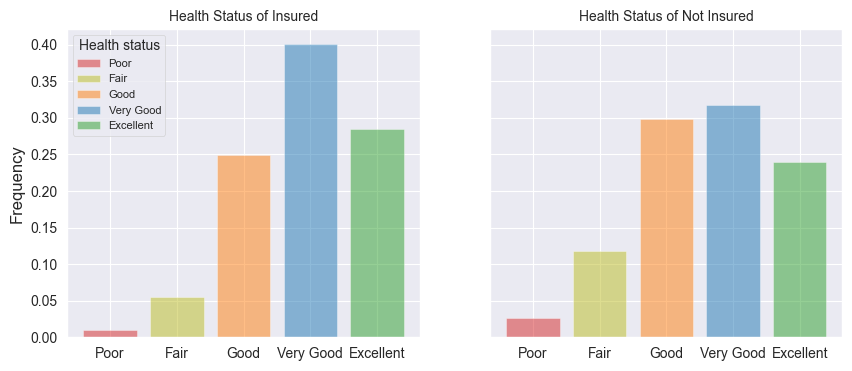

In [159]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize = (10, 4))


# Health status 
health = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
counts_i = insured.value_counts(subset='Health', normalize=True, sort = False, ascending=True)
counts_n = uninsured.value_counts(subset='Health', normalize=True, sort=False, ascending=True)
bar_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
bar_colors = ['tab:red', 'tab:olive', 'tab:orange', 'tab:blue', 'tab:green']

ax[0].bar(health, counts_i, label=bar_labels, color = bar_colors, alpha = 0.5)

ax[0].set_ylabel('Frequency')
ax[0].set_title('Health Status of Insured', fontsize = 10)
ax[0].legend(loc = 'best', title='Health status', fontsize = 8)

ax[1].bar(health, counts_n, label=bar_labels, color = bar_colors, alpha = 0.5)

# ax[1].set_ylabel('fruit supply')
ax[1].set_title('Health Status of Not Insured', fontsize = 10)


# Formal Employment
#employment = ['Not Employed', 'Employed']
#counts_e = insured.value_counts(subset='Employment', normalize=True, sort = False, ascending=True)
#counts_u = uninsured.value_counts(subset='Employment', normalize=True, sort=False, ascending=True)
#bar_labels = ['Not Employed', 'Employed']
#bar_colors = ['tab:olive', 'tab:blue']

#ax[0, 1].bar(employment, counts_e, label=bar_labels, color = bar_colors)

#ax[0, 1].set_ylabel('fruit supply')
#ax[0, 1].set_title('Fruit supply by kind and color', fontsize = 10)
#ax[0, 1].legend(loc = 'best', title='Health status', fontsize = 8)

#ax[1, 1].bar(employment, counts_u, label=bar_labels, color = bar_colors)

#ax[1, 1].set_ylabel('fruit supply')
#ax[1, 1].set_title('Fruit supply by kind and color', fontsize = 10)


plt.show()

fig.savefig('bar_plot_health')

In [119]:
insured = df[df['Insurance'] == 1]
insured.value_counts(subset='Income', normalize=True, sort = False, ascending=True)
uninsured = df[df['Insurance'] == 0]
uninsured.value_counts(subset = 'Income', normalize=True, sort=False, ascending=True)

Income
[0-35k]      0.428131
[35-50k]     0.187390
[50-75k]     0.188713
[75-100k]    0.077601
[>100k]      0.118166
Name: proportion, dtype: float64

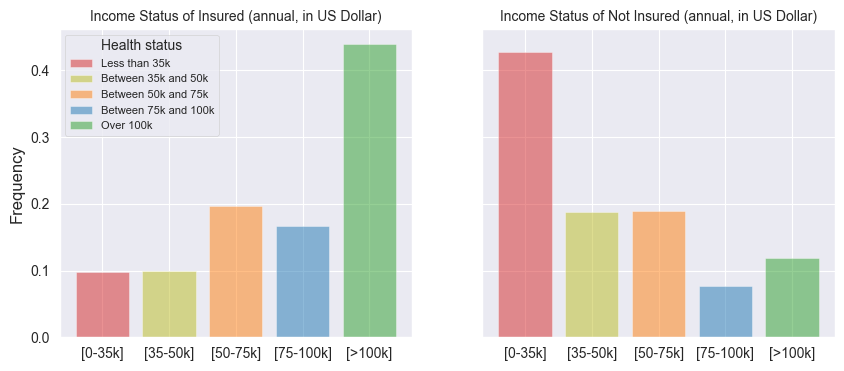

In [160]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize = (10, 4))


# Health status 
income = ['[0-35k]', '[35-50k]', '[50-75k]', '[75-100k]', '[>100k]']
counts_i = insured.value_counts(subset='Income', normalize=True, sort = False, ascending=True)
counts_n = uninsured.value_counts(subset='Income', normalize=True, sort=False, ascending=True)
bar_labels = ['Less than 35k', 'Between 35k and 50k', 'Between 50k and 75k', 'Between 75k and 100k', 'Over 100k']
bar_colors = ['tab:red', 'tab:olive', 'tab:orange', 'tab:blue', 'tab:green']

ax[0].bar(income, counts_i, label=bar_labels, color = bar_colors, alpha = 0.5)

ax[0].set_ylabel('Frequency')
ax[0].set_title('Income Status of Insured (annual, in US Dollar)', fontsize = 10)
ax[0].legend(loc = 'best', title='Health status', fontsize = 8)

ax[1].bar(income, counts_n, label=bar_labels, color = bar_colors, alpha = 0.5)

# ax[1].set_ylabel('fruit supply')
ax[1].set_title('Income Status of Not Insured (annual, in US Dollar)', fontsize = 10)

plt.show()

fig.savefig('bar_plot_income')

# Extracting dataset where age is between 45 and 65

In [46]:
df_age = df[(df['Age'] > 45) & (df['Age'] < 65)]

In [48]:
# Specifying the desired order
df_age = df_age[['Health', 'Insurance', 'Education', 'Region', 'Urban', 'Age', 
                 'Male', 'Status', 'FamSize', 'Race', 'Employment', 'Income',
                 'Ownership']]

In [50]:
# One-Hot Encoding
data_age = pd.get_dummies(df_age, columns=['Region', 'Status', 'Race', 'Income'], drop_first=True)

In [52]:
# converting the boolen values into intigers 
data_age['Region_South'] = data_age['Region_South'].astype(int)
data_age['Region_West'] = data_age['Region_West'].astype(int)
data_age['Status_Single'] = data_age['Status_Single'].astype(int)
data_age['Status_Seperated'] = data_age['Status_Seperated'].astype(int)
data_age['Race_Other'] = data_age['Race_Other'].astype(int)
data_age['Race_White'] = data_age['Race_White'].astype(int)
data_age['Income_[35-50k]'] = data_age['Income_[35-50k]'].astype(int)
data_age['Income_[50-75k]'] = data_age['Income_[50-75k]'].astype(int)
data_age['Income_[75-100k]'] = data_age['Income_[75-100k]'].astype(int)
data_age['Income_[>100k]'] = data_age['Income_[>100k]'].astype(int)

In [55]:
# Specifying the desired order
data_age = data_age[['Health', 'Insurance', 'Education', 'Urban', 'Age', 'Male', 
                 'FamSize', 'Employment', 'Ownership', 'Region_South', 'Region_West', 
                 'Status_Seperated', 'Status_Single', 'Race_White', 'Race_Other',  
                 'Income_[35-50k]', 'Income_[50-75k]', 'Income_[75-100k]', 'Income_[>100k]']]

In [330]:
data_age.to_excel("data_with_age_limit.xlsx")

# Extracting the data with number of chronic diseases

In [59]:
df_num_chron = df[['Region', 'Urban', 'Age', 'Male', 'Status', 'FamSize', 'Race', 
                  'Education', 'Employment', 'Income', 'Ownership', 'Health',
                   'Insurance', 'NumChronDis', 'STRATA', 'PSU', 'SAMPWEIGHT']]

In [61]:
# Specifying the desired order
df_num_chron = df_num_chron[['Health', 'Insurance', 'Education', 'Region', 
                             'Urban', 'Age', 'Male', 'Status', 'FamSize', 'Race', 
                             'Employment', 'Income', 'Ownership', 'NumChronDis', 
                             'STRATA', 'PSU', 'SAMPWEIGHT']]

In [62]:
# One-Hot Encoding
data_num_chron = pd.get_dummies(df_num_chron, columns=['Region', 'Status', 'Race', 'Income'], drop_first=True)

In [64]:
# converting the boolen values into intigers 
data_num_chron['Region_South'] = data_num_chron['Region_South'].astype(int)
data_num_chron['Region_West'] = data_num_chron['Region_West'].astype(int)
data_num_chron['Status_Single'] = data_num_chron['Status_Single'].astype(int)
data_num_chron['Status_Seperated'] = data_num_chron['Status_Seperated'].astype(int)
data_num_chron['Race_Other'] = data_num_chron['Race_Other'].astype(int)
data_num_chron['Race_White'] = data_num_chron['Race_White'].astype(int)
data_num_chron['Income_[35-50k]'] = data_num_chron['Income_[35-50k]'].astype(int)
data_num_chron['Income_[50-75k]'] = data_num_chron['Income_[50-75k]'].astype(int)
data_num_chron['Income_[75-100k]'] = data_num_chron['Income_[75-100k]'].astype(int)
data_num_chron['Income_[>100k]'] = data_num_chron['Income_[>100k]'].astype(int)

In [66]:
# Specifying the desired order
data_num_chron = data_num_chron[['Health', 'Insurance', 'Education', 'Urban', 'Age', 'Male', 
                                 'FamSize', 'Employment', 'Ownership', 'Region_South', 'Region_West', 
                                 'Status_Seperated', 'Status_Single', 'Race_White', 'Race_Other',  
                                 'Income_[35-50k]', 'Income_[50-75k]', 'Income_[75-100k]', 'Income_[>100k]', 
                                 'NumChronDis']]

In [265]:
data_num_chron.to_excel("data_num_chron_dis.xlsx")

# Extracting data with dummy about ever had chronic diseases

In [69]:
df_ever_chron = df[['Region', 'Urban', 'Age', 'Male', 'Status', 'FamSize', 'Race',
                    'Education', 'Employment', 'Income', 'Ownership', 'Health', 'Insurance', 
                    'EverhadChronDis', 'STRATA', 'PSU', 'SAMPWEIGHT']]

In [70]:
df_ever_chron = df_ever_chron[df_ever_chron['EverhadChronDis'] == 1]

In [72]:
# Specifying the desired order
df_ever_chron = df_ever_chron[['Health', 'Insurance', 'Education', 'Region', 'Urban', 
                               'Age', 'Male', 'Status', 'FamSize', 'Race', 'Employment', 'Income', 
                               'Ownership', 'STRATA', 'PSU', 'SAMPWEIGHT']]

In [73]:
# One-Hot Encoding
data_ever_chron = pd.get_dummies(df_ever_chron, columns=['Region', 'Status', 'Race', 'Income'], drop_first=True)

In [75]:
# converting the boolen values into intigers 
data_ever_chron['Region_South'] = data_ever_chron['Region_South'].astype(int)
data_ever_chron['Region_West'] = data_ever_chron['Region_West'].astype(int)
data_ever_chron['Status_Single'] = data_ever_chron['Status_Single'].astype(int)
data_ever_chron['Status_Seperated'] = data_ever_chron['Status_Seperated'].astype(int)
data_ever_chron['Race_Other'] = data_ever_chron['Race_Other'].astype(int)
data_ever_chron['Race_White'] = data_ever_chron['Race_White'].astype(int)
data_ever_chron['Income_[35-50k]'] = data_ever_chron['Income_[35-50k]'].astype(int)
data_ever_chron['Income_[50-75k]'] = data_ever_chron['Income_[50-75k]'].astype(int)
data_ever_chron['Income_[75-100k]'] = data_ever_chron['Income_[75-100k]'].astype(int)
data_ever_chron['Income_[>100k]'] = data_ever_chron['Income_[>100k]'].astype(int)

In [77]:
# Specifying the desired order
data_ever_chron = data_ever_chron[['Health', 'Insurance', 'Education', 'Urban', 'Age', 'Male',
                                   'FamSize', 'Employment', 'Ownership', 'Region_South', 'Region_West',
                                   'Status_Seperated', 'Status_Single', 'Race_White', 'Race_Other',  
                                   'Income_[35-50k]', 'Income_[50-75k]', 'Income_[75-100k]', 'Income_[>100k]']]

In [78]:
data_ever_chron.to_excel("data_with_dummy_chron.xlsx")

In [180]:
df.to_excel("cleaned_data.xlsx")

# Making Summary Statistics 

In [208]:
df.head()

,STRATA,PSU,Region,Urban,SAMPWEIGHT,Age,Male,Status,FamSize,Race,Education,Employment,Income,Ownership,Health,Insurance,ASTHMAEV,CANCEREV,CHEARTDIEV,CHOLHIGHEV,HEARTATTEV,STROKEV,DIAPRE,SMKLSEV,PAINFREQ3MO,NumChronDis,EverhadChronDis
0,151,12,West,1,12052.500,47,0,Single,1,White,17,1,[>100k],0,4,1,1,0,0,1,0,0,0,0,1,3,1
1,102,1,South,1,5964.669,61,1,Partner,2,White,13,1,[35-50k],1,2,1,0,0,0,0,0,0,1,1,1,3,1
3,107,77,North,1,8762.543,37,0,Partner,5,White,15,1,[>100k],1,5,1,0,0,0,0,0,0,0,0,1,1,1
5,129,5,West,1,7149.826,34,0,Partner,2,White,17,1,[>100k],0,4,1,1,0,0,0,0,0,1,0,0,2,1
7,140,153,North,1,2713.903,46,0,Seperated,2,White,17,1,[>100k],1,5,1,0,0,0,0,0,0,0,0,0,0,0


In [209]:
# Separate data into groups
insured = df[df['Insurance'] == 1]
uninsured = df[df['Insurance'] == 0]

In [ ]:
# Define proportion variables
proportion_vars = ['Male', 'Employment', "Ownership", "EverhadChronDis"]  
# Variables to summarize
variables = ["Age", "Male", "Education", "Health", 
             "FamSize", "Employment", "Ownership", "NumChronDis", "EverhadChronDis"]  

In [215]:
# Function to calculate standard error
def standard_error(series):
    return series.std() / np.sqrt(series.count())

# Adjust the summary function to handle percentages for proportion variables
def summary_statistics(group, proportion_vars):
    means = group.mean()  # Default means
    std_errors = group.apply(standard_error)

    # Convert proportions to percentages
    means[proportion_vars] = means[proportion_vars] * 100
    std_errors[proportion_vars] = std_errors[proportion_vars] * 100

    return means, std_errors

In [216]:
# Calculate statistics for all, insured, and uninsured
all_means, all_errors = summary_statistics(df[variables], proportion_vars)
insured_means, insured_errors = summary_statistics(insured[variables], proportion_vars)
uninsured_means, uninsured_errors = summary_statistics(uninsured[variables], proportion_vars)

# Combine results into a summary table
summary_table = pd.DataFrame({
    "All": all_means.round(2).astype(str) + " (" + all_errors.round(2).astype(str) + ")",
    "Insured": insured_means.round(2).astype(str) + " (" + insured_errors.round(2).astype(str) + ")",
    "Uninsured": uninsured_means.round(2).astype(str) + " (" + uninsured_errors.round(2).astype(str) + ")"
})

In [ ]:
# Add variable names as index
summary_table.index = variables

# Display the table
summary_table

                          All       Insured     Uninsured
Age               44.88 (0.1)   45.17 (0.1)   43.3 (0.25)
Male             47.14 (0.41)  46.73 (0.45)  49.34 (1.05)
Education        15.67 (0.02)  15.96 (0.02)  14.08 (0.05)
Health            3.85 (0.01)   3.89 (0.01)   3.63 (0.02)
FamSize           2.99 (0.06)   3.01 (0.06)   2.92 (0.14)
Employment       85.69 (0.29)  88.13 (0.29)  72.44 (0.94)
Ownership        68.01 (0.39)  71.32 (0.41)   50.0 (1.05)
NumChronDis        1.2 (0.01)   1.22 (0.01)   1.13 (0.02)
EverhadChronDis   72.0 (0.37)   72.46 (0.4)  69.53 (0.97)


In [204]:
# exporting the summary table into the word document
# Create a Word document
doc = Document()

# Add a title
doc.add_heading("Summary Statistics", level=1)

In [205]:
# Add a table
table = doc.add_table(rows=1, cols=len(summary_table.columns) + 1)
table.style = 'Table Grid'

In [206]:
# Add header row
header_cells = table.rows[0].cells
header_cells[0].text = "Variable"
for i, col in enumerate(summary_table.columns):
    header_cells[i + 1].text = col

In [207]:
# Add data rows
for row in summary_table.itertuples():
    cells = table.add_row().cells
    cells[0].text = row.Index
    for i, value in enumerate(row[1:]):
        cells[i + 1].text = str(value)

# Save the document
doc.save("summary_statistics.docx")
print("Table exported to summary_statistics.docx")

Table exported to summary_statistics.docx


# IDENTIFICATION OF CAUSAL EFFECTS

## Model 1. Dataset where age is between 45 and 65.

In [441]:
data_age.head()

,Health,Insurance,Education,Urban,Age,Male,FamSize,Employment,Ownership,Region_South,Region_West,Status_Seperated,Status_Single,Race_White,Race_Other,Income_[35-50k],Income_[50-75k],Income_[75-100k],Income_[>100k]
0,4,1,17,1,47,0,1,1,0,0,1,0,1,1,0,0,0,0,1
1,2,1,13,1,61,1,2,1,1,1,0,0,0,1,0,1,0,0,0
7,5,1,17,1,46,0,2,1,1,0,0,1,0,1,0,0,0,0,1
10,4,1,19,1,59,0,1,1,0,1,0,1,0,1,0,0,1,0,0
18,5,0,13,1,63,1,1,1,1,0,1,1,0,1,0,0,0,0,0


In [442]:
# Check correlation matrix
data_age.corr()

,Health,Insurance,Education,Urban,Age,Male,FamSize,Employment,Ownership,Region_South,Region_West,Status_Seperated,Status_Single,Race_White,Race_Other,Income_[35-50k],Income_[50-75k],Income_[75-100k],Income_[>100k]
Health,1.000000,0.099418,0.223743,0.087015,-0.065056,-0.003469,0.010191,0.142625,0.117771,-0.088613,0.050768,-0.073324,-0.026860,0.034344,0.013968,-0.077526,-0.045165,-0.000323,0.226822
Insurance,0.099418,1.000000,0.190620,0.044558,0.004288,-0.006923,0.035878,0.169290,0.188737,-0.125927,0.022936,-0.100953,-0.046198,0.042981,-0.006908,-0.086952,0.012725,0.086099,0.225566
Education,0.223743,0.190620,1.000000,0.151836,-0.050200,-0.034640,0.026034,0.086632,0.128155,-0.075666,0.054295,-0.043465,0.004754,-0.005649,0.079773,-0.124719,-0.111247,-0.015906,0.357377
Urban,0.087015,0.044558,0.151836,1.000000,-0.018749,0.000083,0.019991,0.042014,-0.040660,-0.034148,0.080656,0.004669,0.036111,-0.079744,0.055103,-0.075783,-0.030727,-0.022191,0.141537
Age,-0.065056,0.004288,-0.050200,-0.018749,1.000000,-0.033603,-0.042827,-0.222733,0.096079,-0.021764,-0.017727,0.053736,-0.051691,0.072706,-0.070291,0.010967,0.018863,0.023860,-0.076460
Male,-0.003469,-0.006923,-0.034640,0.000083,-0.033603,1.000000,0.016375,0.118910,-0.029193,-0.013737,-0.000608,-0.071036,0.050047,0.025519,-0.004529,-0.014376,-0.031497,0.001562,0.052303
FamSize,0.010191,0.035878,0.026034,0.019991,-0.042827,0.016375,1.000000,0.006003,0.000877,0.016078,0.022092,-0.002341,-0.071954,-0.021396,0.007632,-0.020854,-0.015598,-0.010459,0.048092
Employment,0.142625,0.169290,0.086632,0.042014,-0.222733,0.118910,0.006003,1.000000,-0.024983,-0.038103,0.003609,0.024178,0.026152,-0.007442,0.005738,0.000514,0.010928,0.024138,0.086562
Ownership,0.117771,0.188737,0.128155,-0.040660,0.096079,-0.029193,0.000877,-0.024983,1.000000,-0.041168,-0.035850,-0.241856,-0.151470,0.159430,-0.030014,-0.099282,-0.051754,0.050572,0.258352
Region_South,-0.088613,-0.125927,-0.075666,-0.034148,-0.021764,-0.013737,0.016078,-0.038103,-0.041168,1.000000,-0.403100,0.037603,0.004427,-0.112023,-0.057450,0.031815,0.020816,-0.038015,-0.099678


In [443]:
sn.set_theme(rc={'figure.figsize':(30,30)})

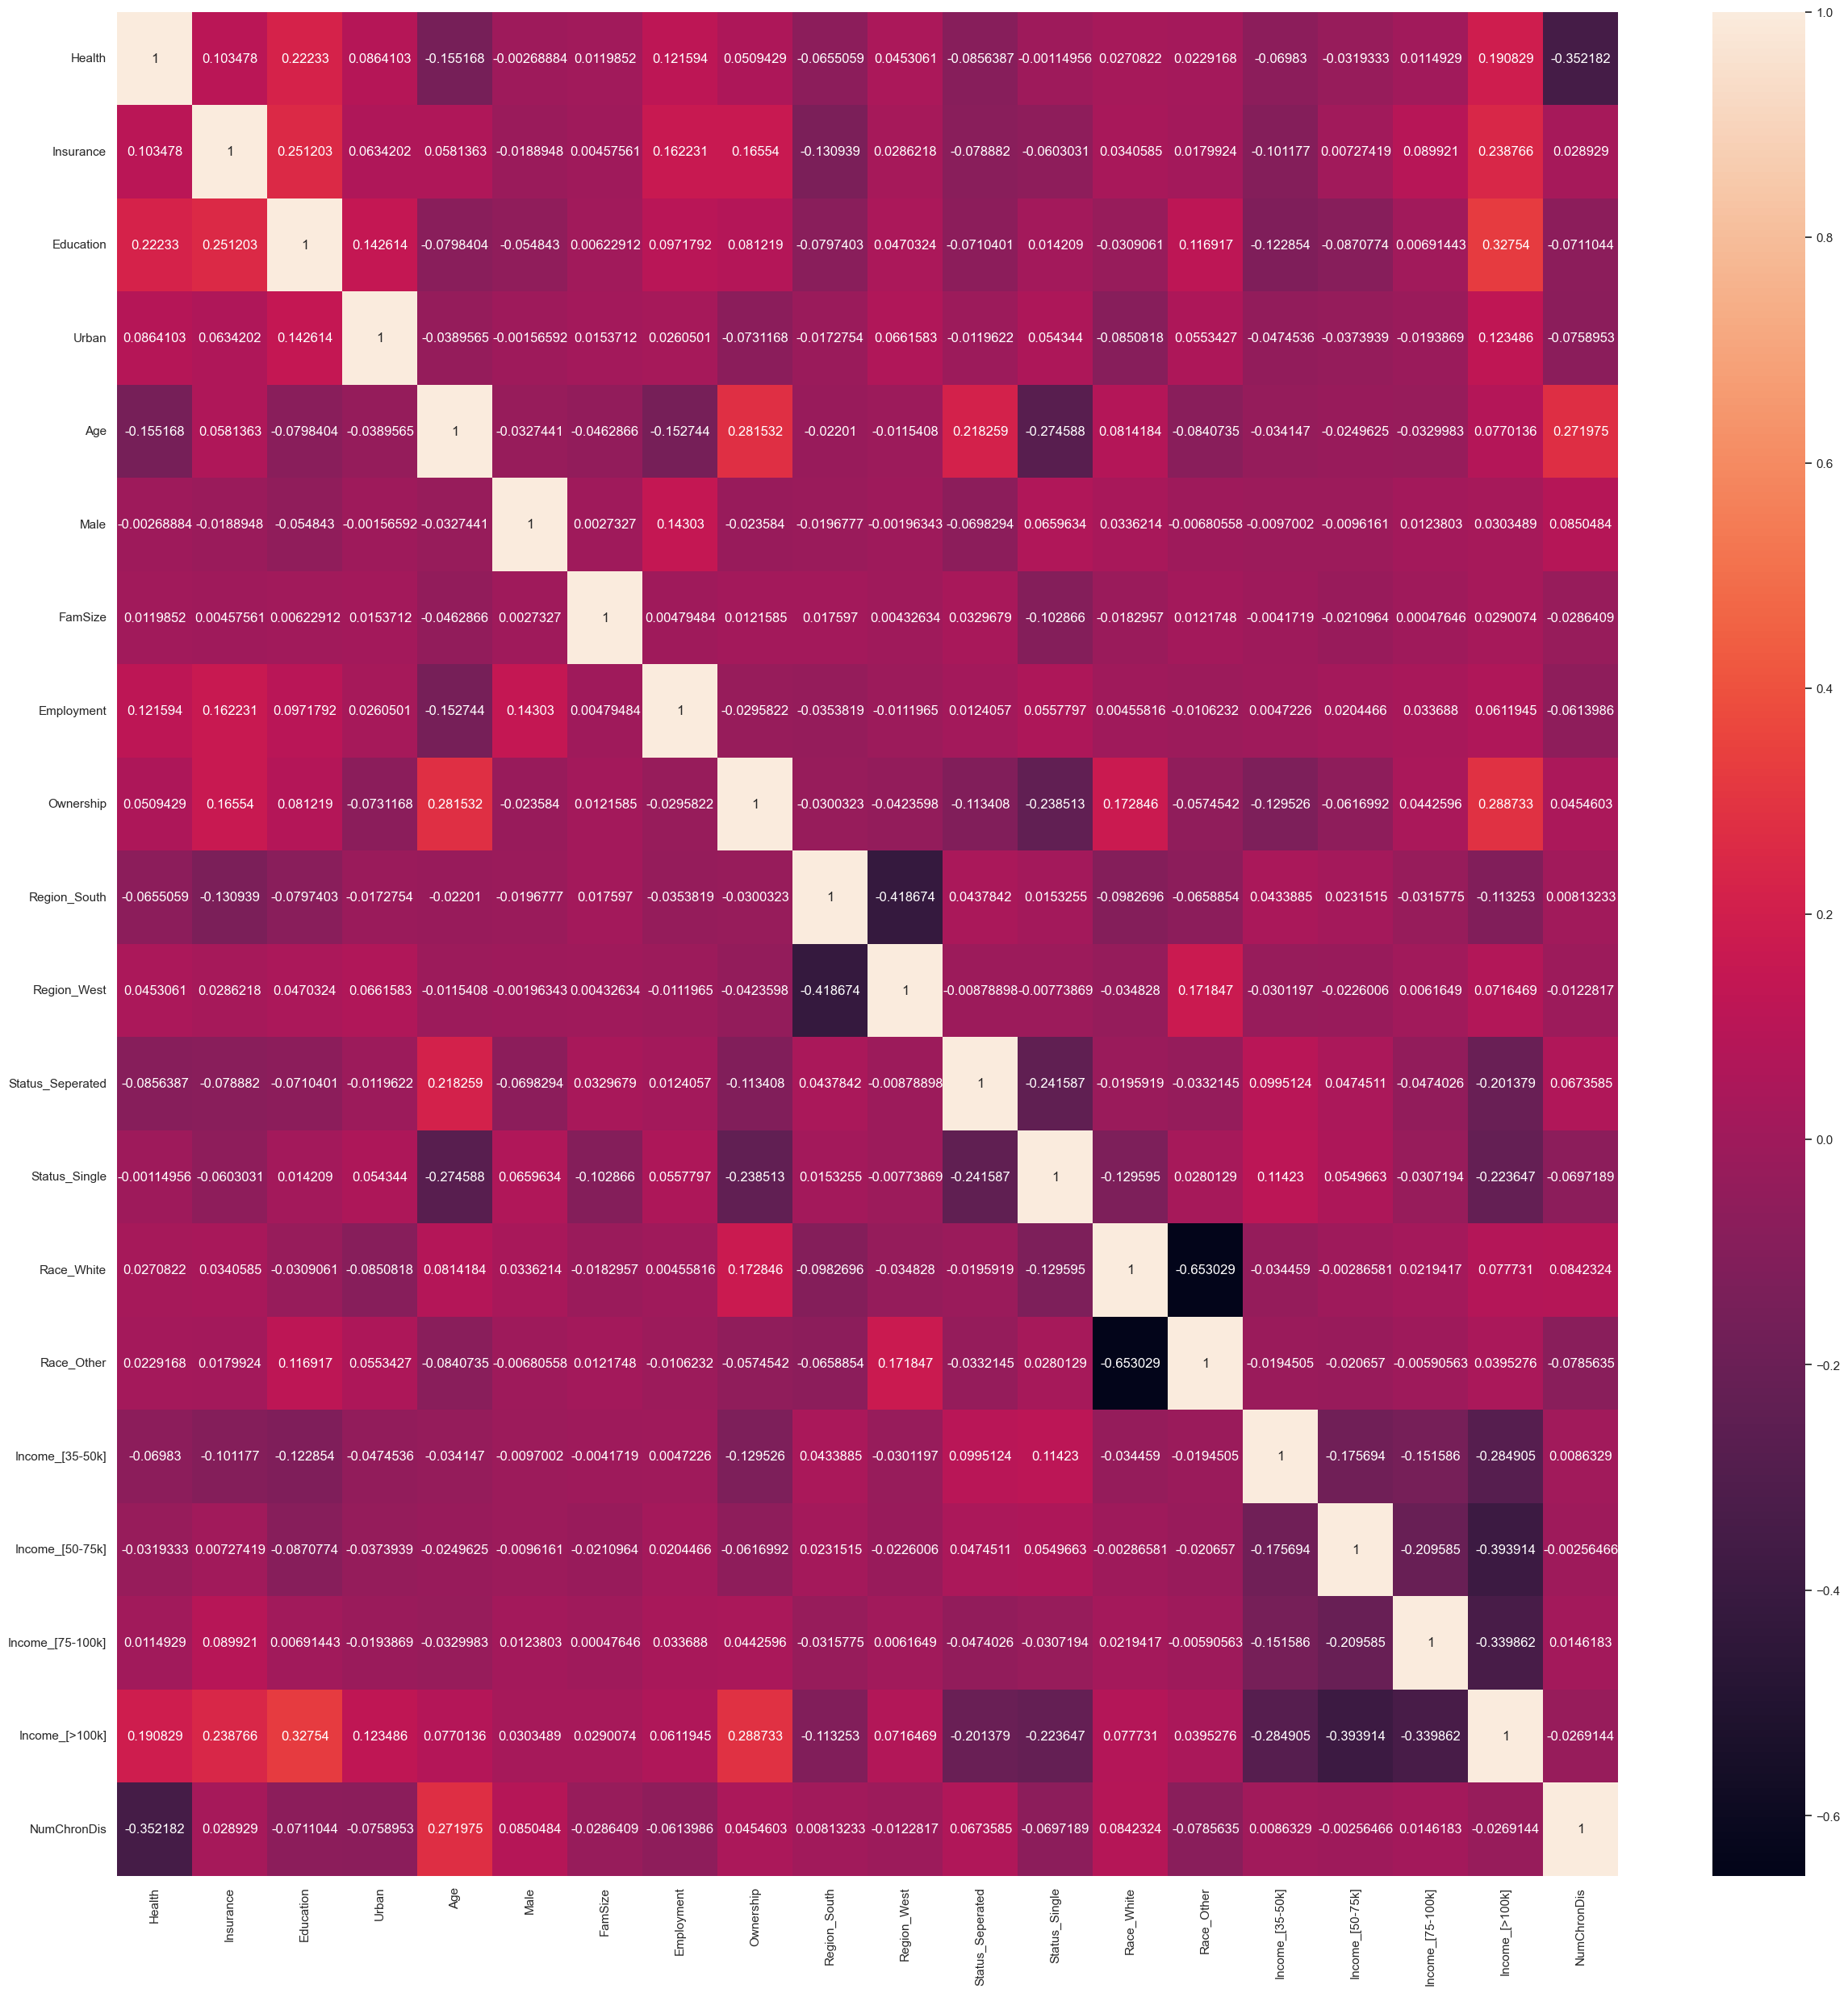

In [444]:
sn.heatmap(data_num_chron.corr(), annot=True, fmt='g')
plt.show()

In [446]:
# Define the outcome variable, treatment variable, and covariates
outcome = 'Health'  # Ordinal outcome: 1 (Poor) to 5 (Excellent)
treatment = 'Insurance'

In [447]:
covariates = [
    'Education', 'Urban', 'Age', 'Male', 'FamSize', 'Employment',
    'Ownership', 'Region_South', 'Region_West', 'Status_Seperated',
    'Status_Single', 'Race_White', 'Race_Other',
    'Income_[35-50k]', 'Income_[50-75k]', 'Income_[75-100k]', 'Income_[>100k]'
]

In [448]:
# Defining the independent variables (treatment + covariates)
X = data_age[[treatment] + covariates]

In [449]:
# Define the dependent variable (ordinal outcome)
y = data_age[outcome]

In [358]:
# Fitting the Ordered Logit Model
model1 = OrderedModel(y, X, distr='logit')  # Using 'logit' for logistic link function

In [359]:
# Fiting the model with weights
result1 = model1.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 1.298983
         Iterations: 82
         Function evaluations: 86
         Gradient evaluations: 86


In [421]:
# Print model summary
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                 Health   Log-Likelihood:                -9096.8
Model:                   OrderedModel   AIC:                         1.824e+04
Method:            Maximum Likelihood   BIC:                         1.839e+04
Date:                Sun, 24 Nov 2024                                         
Time:                        11:35:36                                         
No. Observations:                7003                                         
Df Residuals:                    6981                                         
Df Model:                          18                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Insurance           -0.1323      0.071     -1.854      0.064      -0.272       0.008
Education            0.0984      0.009     10.687      0.000       0.080       0.116
Urban                0.1957      0.062      3.145      0.002       0.074       0.318
Age                 -0.0093      0.004     -2.205      0.027      -0.018      -0.001
Male                -0.1023      0.045     -2.294      0.022      -0.190      -0.015
FamSize             -0.0001      0.003     -0.039      0.969      -0.007       0.006
Employment           0.4503      0.062      7.306      0.000       0.330       0.571
Ownership            0.2393      0.060      3.977      0.000       0.121       0.357
Region_South        -0.1820      0.051     -3.574      0.000      -0.282      -0.082
Region_West          0.0489      0.060      0.822      0.411      -0.068       0.166
Status_Seperated     0.0411      0.057      0.720      0.471      -0.071       0.153
Status_Single        0.1006      0.078      1.283      0.200      -0.053       0.254
Race_White           0.0663      0.078      0.853      0.394      -0.086       0.219
Race_Other          -0.0161      0.112     -0.144      0.886      -0.235       0.203
Income_[35-50k]      0.3239      0.092      3.527      0.000       0.144       0.504
Income_[50-75k]      0.5283      0.082      6.438      0.000       0.367       0.689
Income_[75-100k]     0.6237      0.091      6.871      0.000       0.446       0.802
Income_[>100k]       0.9940      0.086     11.583      0.000       0.826       1.162
1/2                 -1.8678      0.306     -6.102      0.000      -2.468      -1.268
2/3                  0.5870      0.044     13.408      0.000       0.501       0.673
3/4                  0.6092      0.021     28.961      0.000       0.568       0.650
4/5                  0.5615      0.017     32.362      0.000       0.527       0.595
====================================================================================
"""

In [396]:
# Extract coefficients, standard errors, p-values, and confidence intervals
coef1 = result1.params
std_err1 = result1.bse
z_scores1 = result1.tvalues
p_values1 = result1.pvalues
conf_int1 = result1.conf_int()

In [397]:
# Combine into a DataFrame
result1_df = pd.DataFrame({
    "Coef.": round(coef1, 3),
    "Std.Err.": round(std_err1, 3),
    "z": round(z_scores1, 3),
    "P>|z|": round(p_values1, 3),
    "[0.025": round(conf_int1[0], 3),
    "0.975]": round(conf_int1[1], 3)
})

In [398]:
# Update threshold labels
threshold_labels = {
    '1/2': 'Cut-off: Poor/Fair',
    '2/3': 'Cut-off: Fair/Good',
    '3/4': 'Cut-off: Good/Very Good',
    '4/5': 'Cut-off: Very Good/Excellent'
}

In [399]:
# Identify threshold rows (last few rows in params; typically start with numbers like '1/2', '2/3', etc.)
threshold_indices = [idx for idx in result1_df.index if '/' in idx]

In [400]:
# Apply meaningful names to thresholds
result1_df.rename(index=threshold_labels, inplace=True)

In [401]:
# Print the updated table
result1_df

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Insurance,-0.132,0.071,-1.854,0.064,-0.272,0.008
Education,0.098,0.009,10.687,0.000,0.080,0.116
Urban,0.196,0.062,3.145,0.002,0.074,0.318
Age,-0.009,0.004,-2.205,0.027,-0.018,-0.001
Male,-0.102,0.045,-2.294,0.022,-0.190,-0.015
FamSize,-0.000,0.003,-0.039,0.969,-0.007,0.006
Employment,0.450,0.062,7.306,0.000,0.330,0.571
Ownership,0.239,0.060,3.977,0.000,0.121,0.357
Region_South,-0.182,0.051,-3.574,0.000,-0.282,-0.082
Region_West,0.049,0.060,0.822,0.411,-0.068,0.166


In [456]:
# Create a new Document
doc = Document()

# Add title
doc.add_heading('DataFrame Results', level=1)

# Add a table with the same number of rows and columns as the DataFrame
table = doc.add_table(rows=result1_df.shape[0] + 1, cols=result1_df.shape[1])

# Add headers to the table
for j, column_name in enumerate(result1_df.columns):
    table.cell(0, j).text = column_name

# Add rows to the table (iterate through the DataFrame)
for i, row in enumerate(result1_df.values):
    for j, value in enumerate(row):
        table.cell(i + 1, j).text = str(value)

# Save the document
doc.save('output_table.docx')

## Model 2. Dataset with a variable indicating the number of chronic diseases

In [383]:
sn.set_theme(rc={'figure.figsize':(30,30)})

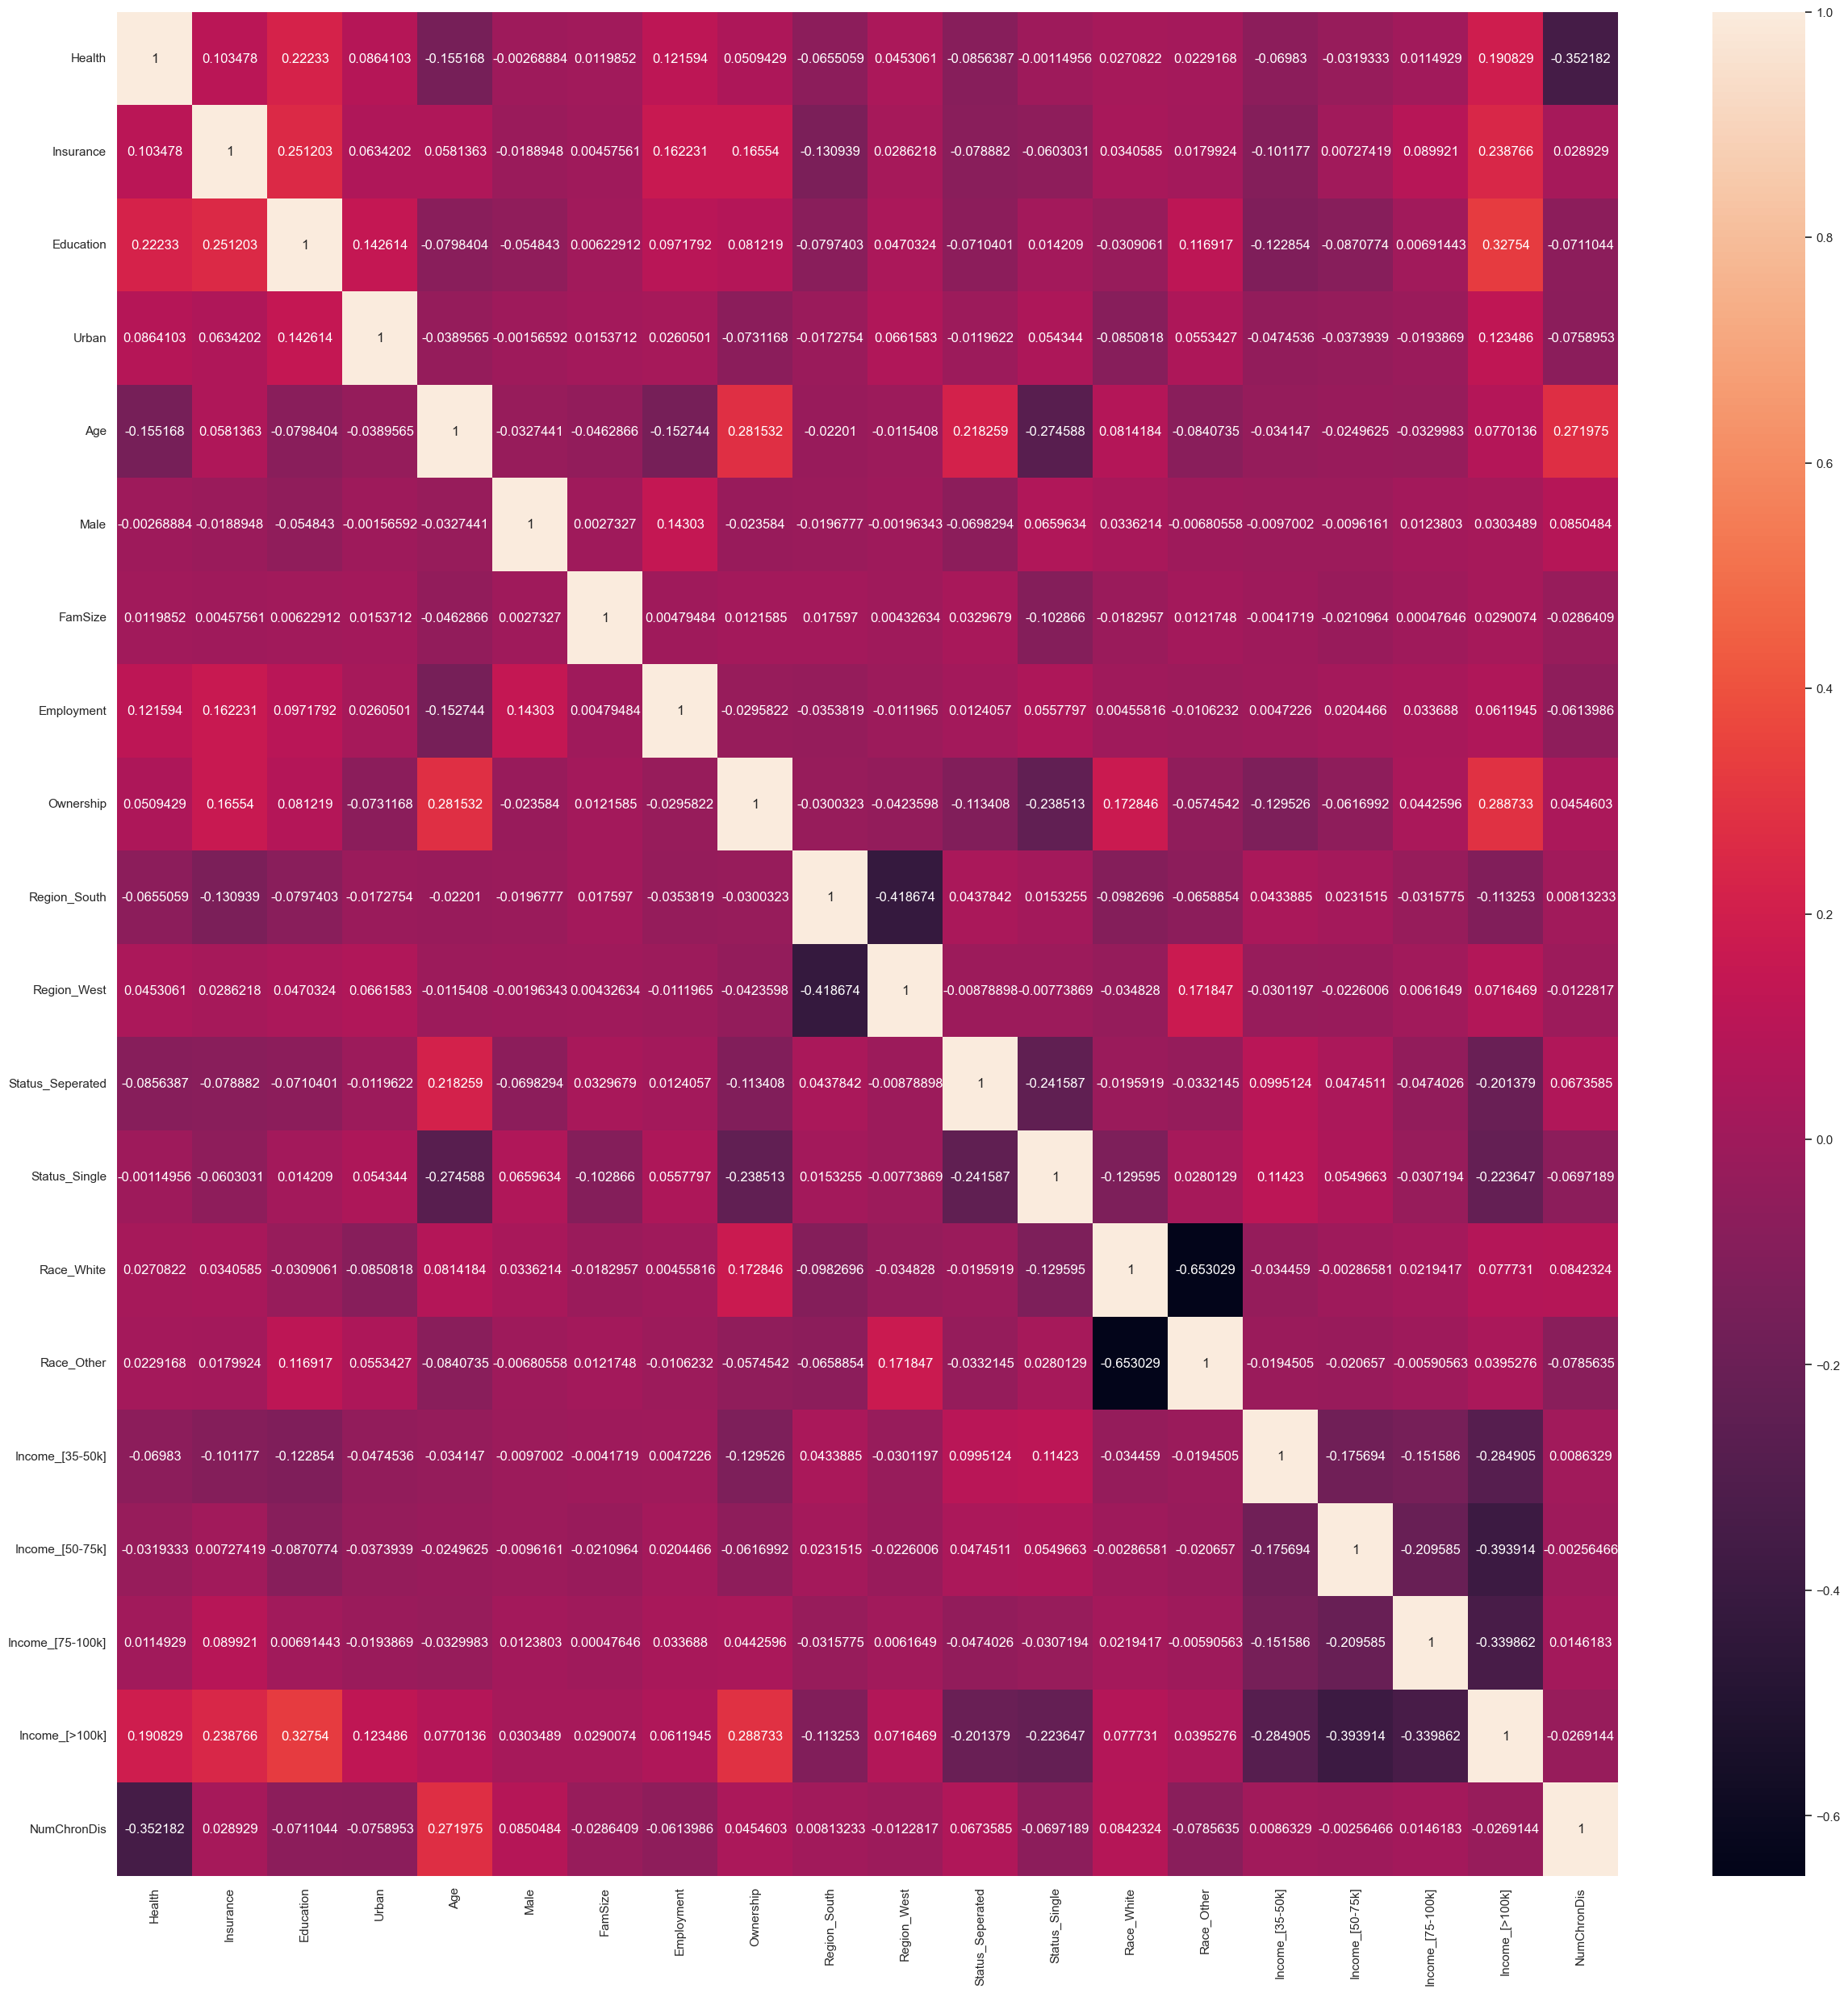

In [384]:
sn.heatmap(data_num_chron.corr(), annot=True, fmt='g')
plt.show()

In [385]:
# Prepare your data
y = data_num_chron['Health']  # Dependent variable: self-reported health status (ordinal)
X = data_num_chron[['Insurance', 'Education', 'Urban', 'Age', 'Male', 'FamSize', 'Employment', 'Ownership', 
          'Region_South', 'Region_West', 'Status_Seperated', 'Status_Single', 'Race_White', 
          'Race_Other', 'Income_[35-50k]', 'Income_[50-75k]', 'Income_[75-100k]', 'Income_[>100k]',
          'NumChronDis']]  # Independent variables: including NumChronDis

In [386]:
# Adding the interaction term between Insurance and ChronicDiseases
X['Insurance_Chronic'] = X['Insurance'] * X['NumChronDis']

In [387]:
# Fit the ordinal regression model
model2 = OrderedModel(y, X, distr='logit')
# result2 = model2.fit()
result2 = model2.fit(maxiter=1000)  # Increase number of iterations

/Users/umidnurmatov/anaconda3/lib/python3.11/site-packages/statsmodels/base/optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/Users/umidnurmatov/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [420]:
# Summary of results for Model 2
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                 Health   Log-Likelihood:                -18671.
Model:                   OrderedModel   AIC:                         3.739e+04
Method:            Maximum Likelihood   BIC:                         3.757e+04
Date:                Sun, 24 Nov 2024                                         
Time:                        11:35:19                                         
No. Observations:               14608                                         
Df Residuals:                   14584                                         
Df Model:                          20                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Insurance             0.0098      0.068      0.144      0.885      -0.123       0.142
Education             0.0731      0.006     11.531      0.000       0.061       0.086
Urban                -0.0004      0.045     -0.008      0.994      -0.088       0.087
Age                  -0.0211      0.002    -13.971      0.000      -0.024      -0.018
Male                  0.0715      0.031      2.289      0.022       0.010       0.133
FamSize              -0.0296      0.003    -10.591      0.000      -0.035      -0.024
Employment           -0.0355      0.047     -0.756      0.449      -0.127       0.056
Ownership            -0.0475      0.038     -1.264      0.206      -0.121       0.026
Region_South          0.0159      0.035      0.450      0.653      -0.053       0.085
Region_West           0.0151      0.041      0.372      0.710      -0.064       0.095
Status_Seperated      0.0289      0.044      0.654      0.513      -0.058       0.116
Status_Single         0.1026      0.045      2.300      0.021       0.015       0.190
Race_White           -0.0367      0.053     -0.692      0.489      -0.141       0.067
Race_Other           -0.0263      0.071     -0.369      0.712      -0.166       0.114
Income_[35-50k]       0.0107      0.062      0.171      0.864      -0.112       0.133
Income_[50-75k]       0.0192      0.057      0.336      0.737      -0.093       0.131
Income_[75-100k]     -0.0529      0.062     -0.851      0.395      -0.175       0.069
Income_[>100k]        0.0002      0.060      0.003      0.997      -0.117       0.117
NumChronDis           0.0149      0.042      0.357      0.721      -0.067       0.097
Insurance_Chronic    -0.1152      0.045     -2.584      0.010      -0.203      -0.028
1/2                  -4.2205      0.160    -26.311      0.000      -4.535      -3.906
2/3                   0.5217      0.035     14.816      0.000       0.453       0.591
3/4                   0.5922      0.016     37.234      0.000       0.561       0.623
4/5                   0.5515      0.012     47.538      0.000       0.529       0.574
=====================================================================================
"""

In [402]:
# Extract coefficients, standard errors, p-values, and confidence intervals
coef2 = result2.params
std_err2 = result2.bse
z_scores2 = result2.tvalues
p_values2 = result2.pvalues
conf_int2 = result2.conf_int()

In [403]:
# Combine into a DataFrame
result2_df = pd.DataFrame({
    "Coef.": round(coef2, 3),
    "Std.Err.": round(std_err2, 3),
    "z": round(z_scores2, 3),
    "P>|z|": round(p_values2, 3),
    "[0.025": round(conf_int2[0], 3),
    "0.975]": round(conf_int2[1], 3)
})

In [404]:
# Identify threshold rows (last few rows in params; typically start with numbers like '1/2', '2/3', etc.)
threshold_indices = [idx for idx in result2_df.index if '/' in idx]

In [405]:
# Apply meaningful names to thresholds
result2_df.rename(index=threshold_labels, inplace=True)

In [407]:
# Print the updated table
result2_df

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Insurance,0.010,0.068,0.144,0.885,-0.123,0.142
Education,0.073,0.006,11.531,0.000,0.061,0.086
Urban,-0.000,0.045,-0.008,0.994,-0.088,0.087
Age,-0.021,0.002,-13.971,0.000,-0.024,-0.018
Male,0.071,0.031,2.289,0.022,0.010,0.133
FamSize,-0.030,0.003,-10.591,0.000,-0.035,-0.024
Employment,-0.035,0.047,-0.756,0.449,-0.127,0.056
Ownership,-0.048,0.038,-1.264,0.206,-0.121,0.026
Region_South,0.016,0.035,0.450,0.653,-0.053,0.085
Region_West,0.015,0.041,0.372,0.710,-0.064,0.095


In [458]:
# Create a new Document
doc = Document()

# Add title
doc.add_heading('DataFrame Results', level=1)

# Add a table with the same number of rows and columns as the DataFrame
table = doc.add_table(rows=result2_df.shape[0] + 1, cols=result2_df.shape[1])

# Add headers to the table
for j, column_name in enumerate(result2_df.columns):
    table.cell(0, j).text = column_name

# Add rows to the table (iterate through the DataFrame)
for i, row in enumerate(result2_df.values):
    for j, value in enumerate(row):
        table.cell(i + 1, j).text = str(value)

# Save the document
doc.save('output_table1.docx')

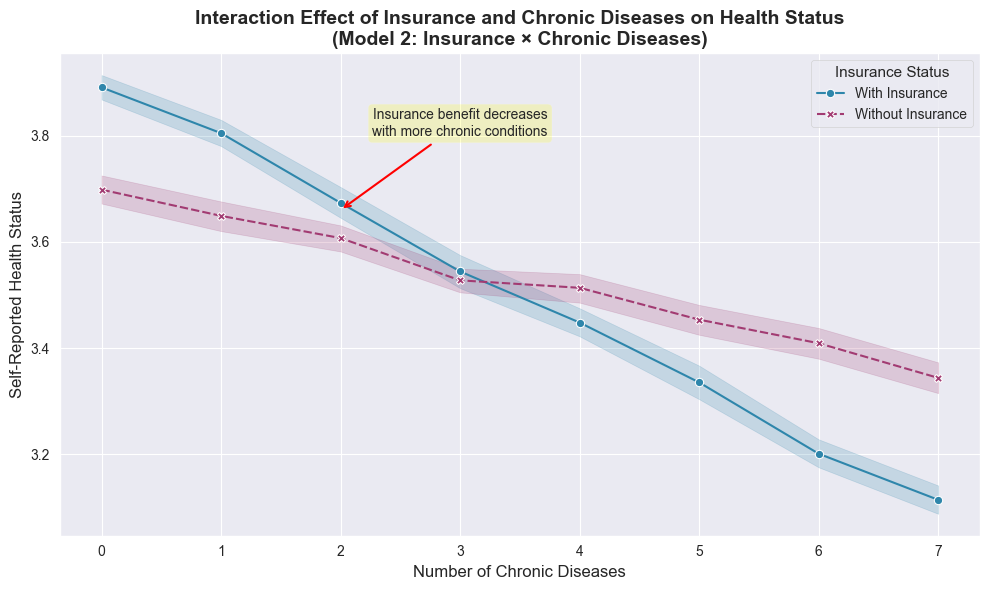

In [155]:
# Create a dataframe for plotting
def create_interaction_data():
    """Create synthetic data based on your model results"""
    chronic_diseases = np.array([0, 1, 2, 3, 4, 5, 6, 7])
    
    # Create data based on the coefficients
    data = []
    for n_chronic in chronic_diseases:
        # Insured group
        health_insured = 3.9 + 0.01 - (0.115 * n_chronic) + np.random.normal(0, 0.1, 50)
        # Uninsured group  
        health_uninsured = 3.7 - (0.05 * n_chronic) + np.random.normal(0, 0.1, 50)
        
        for health in health_insured:
            data.append({'Chronic_Diseases': n_chronic, 
                        'Health_Status': health, 
                        'Insurance_Status': 'With Insurance'})
        for health in health_uninsured:
            data.append({'Chronic_Diseases': n_chronic, 
                        'Health_Status': health, 
                        'Insurance_Status': 'Without Insurance'})
    
    return pd.DataFrame(data)

# Create and plot
df = create_interaction_data()

plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Create the interaction plot
ax = sns.lineplot(data=df, x='Chronic_Diseases', y='Health_Status', 
                  hue='Insurance_Status', style='Insurance_Status',
                  markers=True, err_style='band', 
                  palette=['#2E86AB', '#A23B72'])

plt.xlabel('Number of Chronic Diseases', fontsize=12)
plt.ylabel('Self-Reported Health Status', fontsize=12)
plt.title('Interaction Effect of Insurance and Chronic Diseases on Health Status\n(Model 2: Insurance × Chronic Diseases)', 
          fontsize=14, fontweight='bold')
plt.legend(title='Insurance Status', title_fontsize=11, fontsize=10)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7])

# Add annotation
plt.annotate('Insurance benefit decreases\nwith more chronic conditions', 
             xy=(2, 3.66), xytext=(3, 3.8),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=10, ha='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.2))

plt.tight_layout()
plt.savefig('line_plot')
plt.show()



## Model 3. Dataset with the observations with at least one chronic diseases.

In [409]:
data_ever_chron.head()

,Health,Insurance,Education,Urban,Age,Male,FamSize,Employment,Ownership,Region_South,Region_West,Status_Seperated,Status_Single,Race_White,Race_Other,Income_[35-50k],Income_[50-75k],Income_[75-100k],Income_[>100k]
0,4,1,17,1,47,0,1,1,0,0,1,0,1,1,0,0,0,0,1
1,2,1,13,1,61,1,2,1,1,1,0,0,0,1,0,1,0,0,0
3,5,1,15,1,37,0,5,1,1,0,0,0,0,1,0,0,0,0,1
5,4,1,17,1,34,0,2,1,0,0,1,0,0,1,0,0,0,0,1
10,4,1,19,1,59,0,1,1,0,1,0,1,0,1,0,0,1,0,0


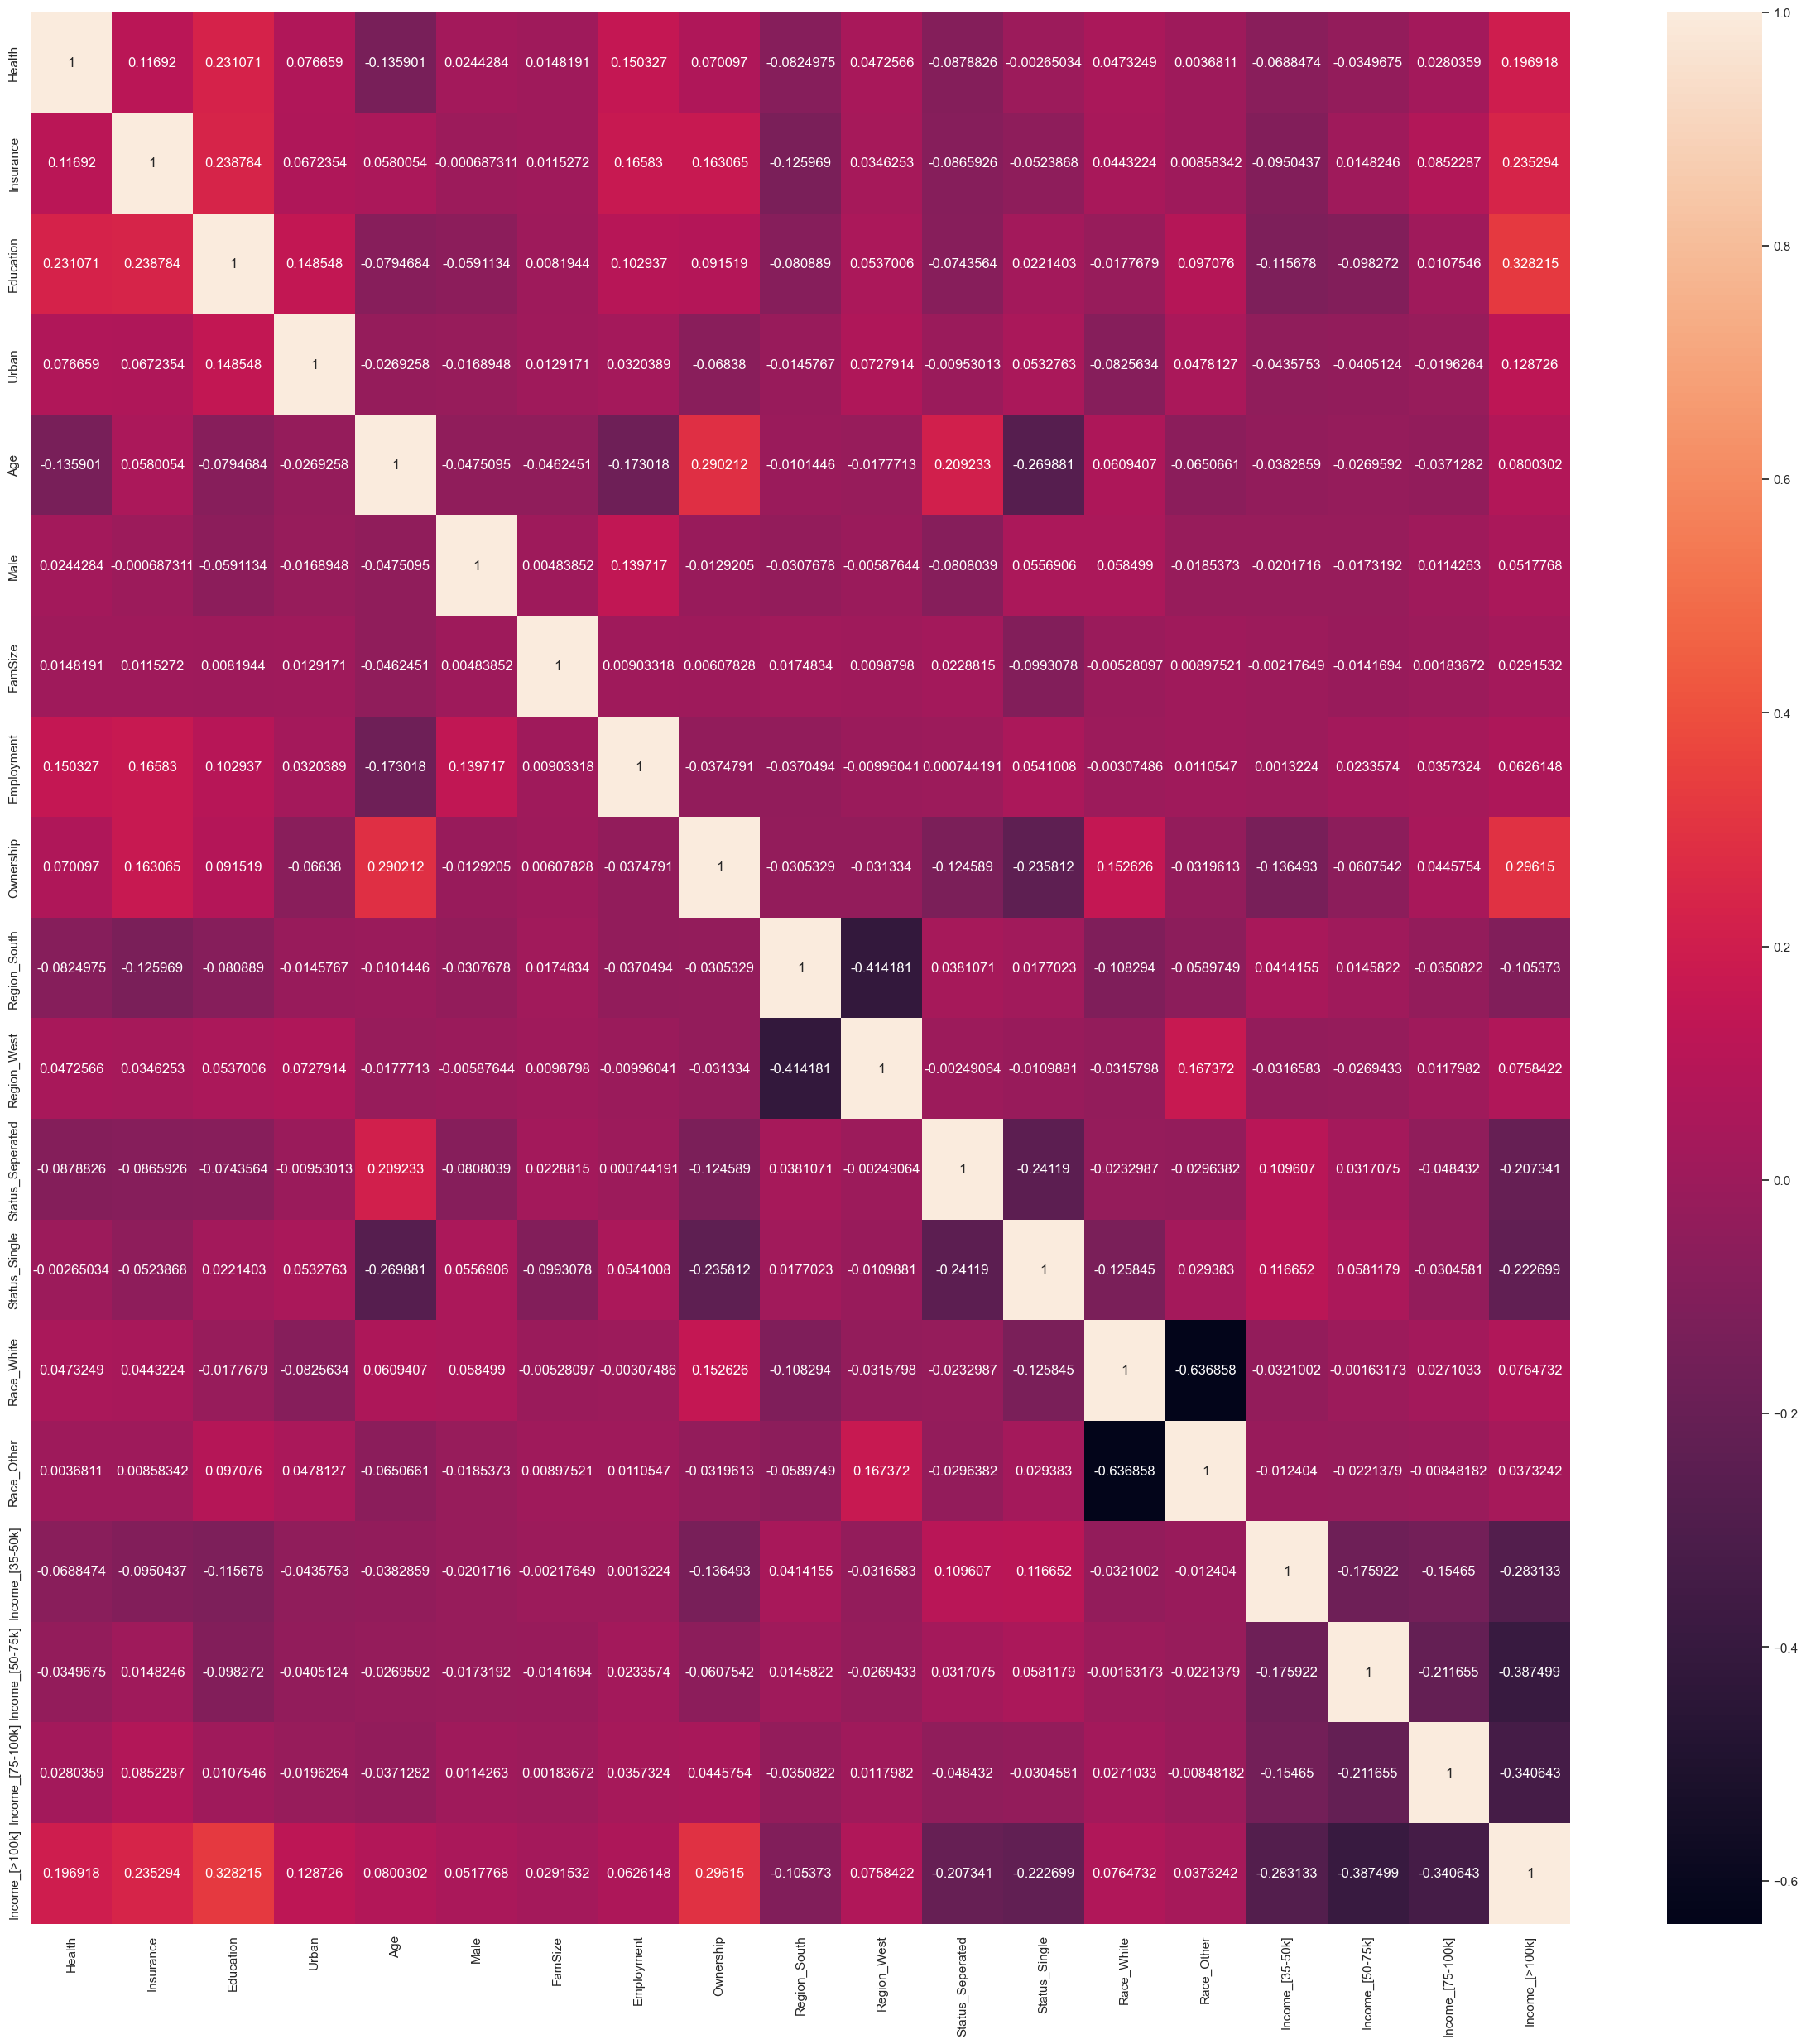

In [411]:
sn.heatmap(data_ever_chron.corr(), annot=True, fmt='g')
plt.show()

In [412]:
# Define the outcome variable, treatment variable, and covariates
outcome = 'Health'  # Ordinal outcome: 1 (Poor) to 5 (Excellent)
treatment = 'Insurance'

In [413]:
covariates = [
    'Education', 'Urban', 'Age', 'Male', 'FamSize', 'Employment',
    'Ownership', 'Region_South', 'Region_West', 'Status_Seperated',
    'Status_Single', 'Race_White', 'Race_Other',
    'Income_[35-50k]', 'Income_[50-75k]', 'Income_[75-100k]', 'Income_[>100k]'
]

In [414]:
# Defining the independent variables (treatment + covariates)
X = data_ever_chron[[treatment] + covariates]

In [415]:
# Define the dependent variable (ordinal outcome)
y = data_ever_chron[outcome]

In [416]:
# Fitting the Ordered Logit Model
model3 = OrderedModel(y, X, distr='logit')  # Using 'logit' for logistic link function

In [417]:
# Fiting the model with weights
result3 = model3.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 1.271165
         Iterations: 76
         Function evaluations: 80
         Gradient evaluations: 80


In [419]:
# Print model summary
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                 Health   Log-Likelihood:                -13370.
Model:                   OrderedModel   AIC:                         2.678e+04
Method:            Maximum Likelihood   BIC:                         2.694e+04
Date:                Sun, 24 Nov 2024                                         
Time:                        11:34:53                                         
No. Observations:               10518                                         
Df Residuals:                   10496                                         
Df Model:                          18                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Insurance           -0.0088      0.056     -0.155      0.876      -0.119       0.102
Education            0.1065      0.008     13.815      0.000       0.091       0.122
Urban                0.1706      0.051      3.341      0.001       0.071       0.271
Age                 -0.0212      0.002    -12.095      0.000      -0.025      -0.018
Male                -0.0011      0.037     -0.030      0.976      -0.073       0.071
FamSize              0.0003      0.003      0.118      0.906      -0.005       0.005
Employment           0.4242      0.055      7.759      0.000       0.317       0.531
Ownership            0.1528      0.045      3.393      0.001       0.065       0.241
Region_South        -0.1404      0.042     -3.348      0.001      -0.223      -0.058
Region_West          0.0553      0.048      1.147      0.251      -0.039       0.150
Status_Seperated     0.0504      0.051      0.983      0.326      -0.050       0.151
Status_Single        0.0660      0.054      1.231      0.218      -0.039       0.171
Race_White           0.1536      0.063      2.419      0.016       0.029       0.278
Race_Other          -0.0798      0.088     -0.904      0.366      -0.253       0.093
Income_[35-50k]      0.3287      0.072      4.535      0.000       0.187       0.471
Income_[50-75k]      0.5295      0.067      7.914      0.000       0.398       0.661
Income_[75-100k]     0.6870      0.073      9.403      0.000       0.544       0.830
Income_[>100k]       0.9579      0.071     13.557      0.000       0.819       1.096
1/2                 -2.2631      0.182    -12.439      0.000      -2.620      -1.907
2/3                  0.6524      0.036     17.911      0.000       0.581       0.724
3/4                  0.6324      0.017     36.854      0.000       0.599       0.666
4/5                  0.6540      0.014     47.824      0.000       0.627       0.681
====================================================================================
"""

In [424]:
# Extract coefficients, standard errors, p-values, and confidence intervals
coef3 = result3.params
std_err3 = result3.bse
z_scores3 = result3.tvalues
p_values3 = result3.pvalues
conf_int3 = result3.conf_int()

In [425]:
# Combine into a DataFrame
result3_df = pd.DataFrame({
    "Coef.": round(coef3, 3),
    "Std.Err.": round(std_err3, 3),
    "z": round(z_scores3, 3),
    "P>|z|": round(p_values3, 3),
    "[0.025": round(conf_int3[0], 3),
    "0.975]": round(conf_int3[1], 3)
})

In [426]:
# Identify threshold rows (last few rows in params; typically start with numbers like '1/2', '2/3', etc.)
threshold_indices = [idx for idx in result3_df.index if '/' in idx]

In [427]:
# Apply meaningful names to thresholds
result3_df.rename(index=threshold_labels, inplace=True)

In [428]:
# Print the updated table
result3_df

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Insurance,-0.009,0.056,-0.155,0.876,-0.119,0.102
Education,0.106,0.008,13.815,0.000,0.091,0.122
Urban,0.171,0.051,3.341,0.001,0.071,0.271
Age,-0.021,0.002,-12.095,0.000,-0.025,-0.018
Male,-0.001,0.037,-0.030,0.976,-0.073,0.071
FamSize,0.000,0.003,0.118,0.906,-0.005,0.005
Employment,0.424,0.055,7.759,0.000,0.317,0.531
Ownership,0.153,0.045,3.393,0.001,0.065,0.241
Region_South,-0.140,0.042,-3.348,0.001,-0.223,-0.058
Region_West,0.055,0.048,1.147,0.251,-0.039,0.150


In [463]:
# Create a new Document
doc = Document()

# Add title
doc.add_heading('DataFrame Results', level=1)

# Add a table with the same number of rows and columns as the DataFrame
table = doc.add_table(rows=result3_df.shape[0] + 1, cols=result3_df.shape[1])

# Add headers to the table
for j, column_name in enumerate(result3_df.columns):
    table.cell(0, j).text = column_name

# Add rows to the table (iterate through the DataFrame)
for i, row in enumerate(result3_df.values):
    for j, value in enumerate(row):
        table.cell(i + 1, j).text = str(value)

# Save the document
doc.save('output_table2.docx')

# Propensity Score Matching: applied for the dataset used in Model 1

In [84]:
# Prepare the treatment variable (Insurance) and covariates (X)
treatment = data_age['Insurance']  # Treatment: insured (1) or uninsured (0)
covariates = data_age[['Education', 'Urban', 'Age', 'Male', 'FamSize', 'Employment', 'Ownership', 
                   'Region_South', 'Region_West', 'Status_Seperated', 'Status_Single', 'Race_White', 
                   'Race_Other', 'Income_[35-50k]', 'Income_[50-75k]', 'Income_[75-100k]', 'Income_[>100k]']]


In [85]:
# Add constant for the logistic regression model
covariates = sm.add_constant(covariates)

In [86]:
# Fit logistic regression model to estimate propensity scores
logit_model = sm.Logit(treatment, covariates)
logit_results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.319047
         Iterations 8


In [87]:
# Get the predicted propensity scores
propensity_scores = logit_results.predict(covariates)

In [88]:
# Separate the insured and uninsured individuals
insured = data_age[treatment == 1]
uninsured = data_age[treatment == 0]

# Get the propensity scores for each group
insured_scores = propensity_scores[treatment == 1]
uninsured_scores = propensity_scores[treatment == 0]

# Nearest Neighbor Matching (find the closest propensity score matches)
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(uninsured_scores.values.reshape(-1, 1))  # Fit model on the propensity scores of the uninsured group

# Find the nearest neighbor for each insured individual
distances, indices = nn.kneighbors(insured_scores.values.reshape(-1, 1))

# Get the matched individuals from the uninsured group
matched_uninsured = uninsured.iloc[indices.flatten()]

# Combine the matched insured and uninsured groups
matched_data = pd.concat([insured, matched_uninsured])

# Check how many matches we have
print(matched_data.shape)

(12106, 19)


In [89]:
# Outcome variable: self-reported health status (Health_num)
outcome = data_age['Health']

# Extract the outcome variable for the matched dataset
matched_outcome = outcome.loc[matched_data.index]

# Calculate the mean difference in health status between the insured and matched uninsured groups
mean_health_status_insured = matched_outcome[matched_data['Insurance'] == 1].mean()
mean_health_status_uninsured = matched_outcome[matched_data['Insurance'] == 0].mean()

# The treatment effect is the difference in means between insured and uninsured groups
treatment_effect = mean_health_status_insured - mean_health_status_uninsured
print(f"Estimated Treatment Effect: {treatment_effect}")

Estimated Treatment Effect: -0.06228316537254219


# Propensity Score Matching: applied for the dataset used in Model 2

In [91]:
# Prepare the treatment variable (Insurance) and covariates (X)
treatment = data_num_chron['Insurance']  # Treatment: insured (1) or uninsured (0)
covariates = data_num_chron[['Education', 'Urban', 'Age', 'Male', 'FamSize', 'Employment', 'Ownership', 
                   'Region_South', 'Region_West', 'Status_Seperated', 'Status_Single', 'Race_White', 
                   'Race_Other', 'Income_[35-50k]', 'Income_[50-75k]', 'Income_[75-100k]', 'Income_[>100k]', 'NumChronDis']]


# Add constant for the logistic regression model
covariates = sm.add_constant(covariates)

In [92]:
# Fit logistic regression model to estimate propensity scores
logit_model = sm.Logit(treatment, covariates)
logit_results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.339740
         Iterations 7


In [93]:
# Get the predicted propensity scores
propensity_scores = logit_results.predict(covariates)

In [95]:
# Separate the insured and uninsured individuals
insured = data_num_chron[treatment == 1]
uninsured = data_num_chron[treatment == 0]

# Get the propensity scores for each group
insured_scores = propensity_scores[treatment == 1]
uninsured_scores = propensity_scores[treatment == 0]

# Nearest Neighbor Matching (find the closest propensity score matches)
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(uninsured_scores.values.reshape(-1, 1))  # Fit model on the propensity scores of the uninsured group

# Find the nearest neighbor for each insured individual
distances, indices = nn.kneighbors(insured_scores.values.reshape(-1, 1))

# Get the matched individuals from the uninsured group
matched_uninsured = uninsured.iloc[indices.flatten()]

# Combine the matched insured and uninsured groups
matched_data = pd.concat([insured, matched_uninsured])

# Check how many matches we have
print(matched_data.shape)

(24680, 20)


In [96]:
# Outcome variable: self-reported health status (Health_num)
outcome = data_num_chron['Health']

# Extract the outcome variable for the matched dataset
matched_outcome = outcome.loc[matched_data.index]

# Calculate the mean difference in health status between the insured and matched uninsured groups
mean_health_status_insured = matched_outcome[matched_data['Insurance'] == 1].mean()
mean_health_status_uninsured = matched_outcome[matched_data['Insurance'] == 0].mean()

# The treatment effect is the difference in means between insured and uninsured groups
treatment_effect = mean_health_status_insured - mean_health_status_uninsured
print(f"Estimated Treatment Effect: {treatment_effect}")

Estimated Treatment Effect: -0.0418152350081038


# Propensity Score Matching: applied for the dataset used in Model 3

In [97]:
# Prepare the treatment variable (Insurance) and covariates (X)
treatment = data_ever_chron['Insurance']  # Treatment: insured (1) or uninsured (0)
covariates = data_ever_chron[['Education', 'Urban', 'Age', 'Male', 'FamSize', 'Employment', 'Ownership', 
                   'Region_South', 'Region_West', 'Status_Seperated', 'Status_Single', 'Race_White', 
                   'Race_Other', 'Income_[35-50k]', 'Income_[50-75k]', 'Income_[75-100k]', 'Income_[>100k]']]


# Add constant for the logistic regression model
covariates = sm.add_constant(covariates)

In [98]:
# Fit logistic regression model to estimate propensity scores
logit_model = sm.Logit(treatment, covariates)
logit_results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.334965
         Iterations 7


In [99]:
# Get the predicted propensity scores
propensity_scores = logit_results.predict(covariates)

In [100]:
# Separate the insured and uninsured individuals
insured = data_ever_chron[treatment == 1]
uninsured = data_ever_chron[treatment == 0]

# Get the propensity scores for each group
insured_scores = propensity_scores[treatment == 1]
uninsured_scores = propensity_scores[treatment == 0]

# Nearest Neighbor Matching (find the closest propensity score matches)
nn = NearestNeighbors(n_neighbors=1, metric='euclidean')
nn.fit(uninsured_scores.values.reshape(-1, 1))  # Fit model on the propensity scores of the uninsured group

# Find the nearest neighbor for each insured individual
distances, indices = nn.kneighbors(insured_scores.values.reshape(-1, 1))

# Get the matched individuals from the uninsured group
matched_uninsured = uninsured.iloc[indices.flatten()]

# Combine the matched insured and uninsured groups
matched_data = pd.concat([insured, matched_uninsured])

# Check how many matches we have
print(matched_data.shape)

(17882, 19)


In [101]:
# Outcome variable: self-reported health status (Health_num)
outcome = data_ever_chron['Health']

# Extract the outcome variable for the matched dataset
matched_outcome = outcome.loc[matched_data.index]

# Calculate the mean difference in health status between the insured and matched uninsured groups
mean_health_status_insured = matched_outcome[matched_data['Insurance'] == 1].mean()
mean_health_status_uninsured = matched_outcome[matched_data['Insurance'] == 0].mean()

# The treatment effect is the difference in means between insured and uninsured groups
treatment_effect = mean_health_status_insured - mean_health_status_uninsured
print(f"Estimated Treatment Effect: {treatment_effect}")

Estimated Treatment Effect: -0.07057376132423698
